# About Dataset
Abstract: A real online retail transaction data set of one year.

Data Set Information:
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2010 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.


Source:
Dr. Daqing Chen, Course Director: MSc Data Science. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

In [115]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
data=pd.read_excel('online_retail_II.xlsx')
data.head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom


# Understanding data

In [143]:
data.describe()

,Quantity,Price,Customer ID,Total,Duration
count,406830.000000,406830.000000,406830.000000,406830.000000,406830
mean,12.061276,3.460507,15287.684160,20.401848,151 days 20:43:08.623257870
std,248.693065,69.315080,1713.603074,427.591192,112 days 20:25:00.632723598
min,-80995.000000,0.000000,12346.000000,-168469.600000,0 days 00:00:00
25%,2.000000,1.250000,13953.000000,4.200000,50 days 00:00:00
50%,5.000000,1.950000,15152.000000,11.100000,131 days 00:00:00
75%,12.000000,3.750000,16791.000000,19.500000,247 days 00:00:00
max,80995.000000,38970.000000,18287.000000,168469.600000,373 days 00:00:00


In [4]:
data.isnull().any()

Invoice        False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
Price          False
Customer ID     True
Country        False
dtype: bool

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().any()

Invoice        False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
Price          False
Customer ID    False
Country        False
dtype: bool

In [144]:
data=data[data['Quantity']>0]

In [146]:

data.describe()

,Quantity,Price,Customer ID,Total,Duration
count,397925.000000,397925.000000,397925.000000,397925.000000,397925
mean,13.021793,3.116212,15294.308601,22.394737,151 days 13:29:56.349563360
std,180.419984,22.096773,1713.172738,309.055200,112 days 19:40:17.473376940
min,1.000000,0.000000,12346.000000,0.000000,0 days 00:00:00
25%,2.000000,1.250000,13969.000000,4.680000,50 days 00:00:00
50%,6.000000,1.950000,15159.000000,11.800000,131 days 00:00:00
75%,12.000000,3.750000,16795.000000,19.800000,246 days 00:00:00
max,80995.000000,8142.750000,18287.000000,168469.600000,373 days 00:00:00


# Preparing data
RFM method:

Recency: how recently a customer has purchased

Frequency: how often they purchased

Monetary: how much the customer spends

In [7]:
data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom


In [147]:
data['Total']=data['Quantity']*data['Price']
Total=data.groupby('Customer ID')['Total'].sum()
Total

Customer ID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Total, Length: 4339, dtype: float64

In [148]:
Count=data.groupby('Customer ID')['Invoice'].count()
Count

Customer ID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    756
18287.0     70
Name: Invoice, Length: 4339, dtype: int64

In [149]:
data['InvoiceDate'] = pd.to_datetime( data['InvoiceDate'])
data['InvoiceDate_new'] = data['InvoiceDate'].dt.date
data['Duration']=data['InvoiceDate_new'].max()-data['InvoiceDate_new']
purchase_time=data.groupby('Customer ID')['Duration'].min()
purchase_time

Customer ID
12346.0   325 days
12347.0     2 days
12348.0    75 days
12349.0    18 days
12350.0   310 days
            ...   
18280.0   277 days
18281.0   180 days
18282.0     7 days
18283.0     3 days
18287.0    42 days
Name: Duration, Length: 4339, dtype: timedelta64[ns]

In [150]:
data_cleaned=pd.merge(Total, Count, on='Customer ID', how='inner')
data_cleaned=pd.merge(data_cleaned, purchase_time, on='Customer ID', how='inner')
data_cleaned=data_cleaned.reset_index()
data_cleaned.columns=["Id", "Total", "Count", "Lasttime_purchase"]

data_cleaned['Lasttime_purchase'] = data_cleaned['Lasttime_purchase'].dt.days
data_cleaned

,Id,Total,Count,Lasttime_purchase
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,310
...,...,...,...,...
4334,18280.0,180.60,10,277
4335,18281.0,80.82,7,180
4336,18282.0,178.05,12,7
4337,18283.0,2094.88,756,3


# Univariate Analysis

In [151]:
data_cleaned.isnull().sum()

Id                   0
Total                0
Count                0
Lasttime_purchase    0
dtype: int64

In [152]:
data_cleaned.describe()

,Id,Total,Count,Lasttime_purchase
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,2053.797166,91.708919,92.041484
std,1721.889758,8988.247836,228.792813,100.007757
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.500000,307.245000,17.000000,17.000000
50%,15299.000000,674.450000,41.000000,50.000000
75%,16778.500000,1661.640000,100.000000,141.500000
max,18287.000000,280206.020000,7847.000000,373.000000


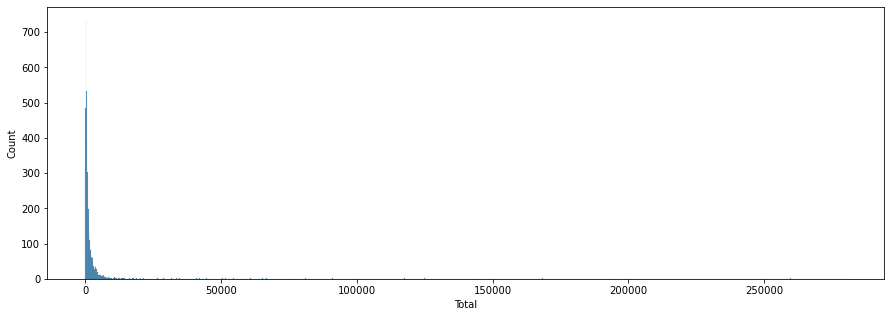

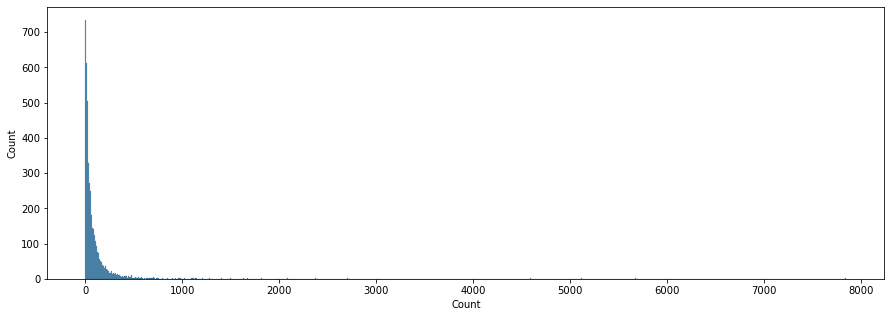

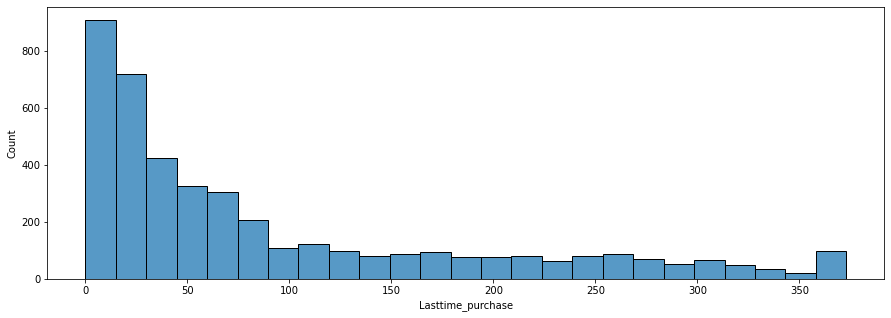

In [153]:
columns = ['Total','Count', 'Lasttime_purchase']
for i in columns:
    
    plt.subplots(1,1, figsize=(15,5))
    sns.histplot(data_cleaned[i])
    
    


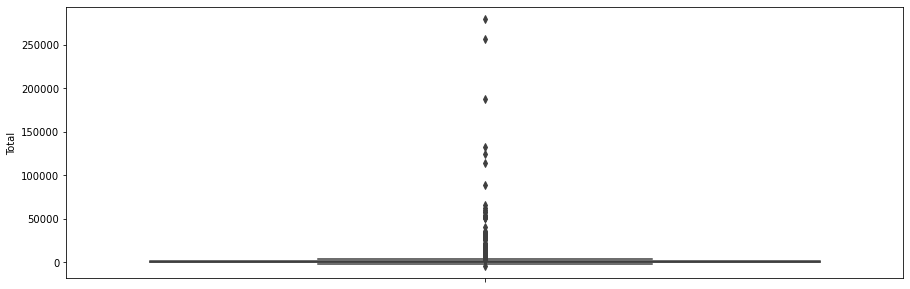

<Figure size 432x288 with 0 Axes>

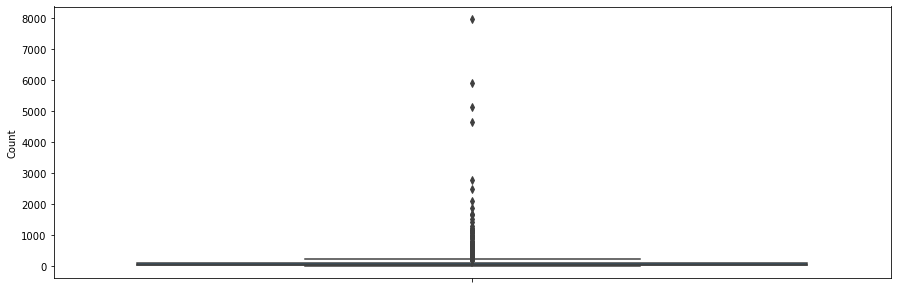

<Figure size 432x288 with 0 Axes>

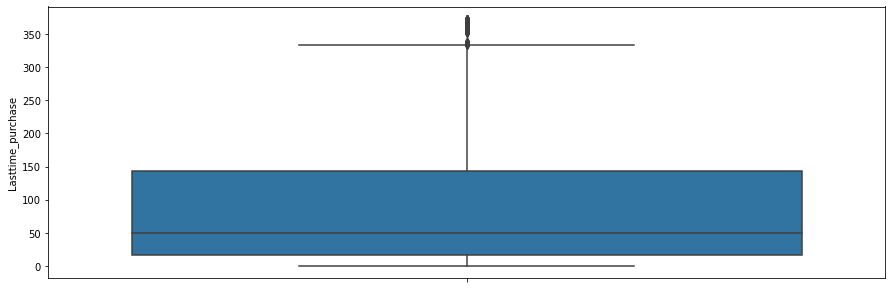

<Figure size 432x288 with 0 Axes>

In [15]:
columns=['Total', 'Count', 'Lasttime_purchase']

for i in columns:
    plt.subplots(1,1, figsize=(15,5))
    sns.boxplot(data=data_cleaned, y=data_cleaned[i])
    plt.figure()


### Normalization

In [154]:
q1_t = scaled_data['Total'].quantile(0.05)
q3_t= scaled_data['Total'].quantile(0.95)
IQR = q3_t - q1_t
data_cleaned = scaled_data[(scaled_data['Total'] >= q1_t - 1.5*IQR) & (scaled_data['Total'] <= q3_t + 1.5*IQR)]



q1_c = scaled_data['Count'].quantile(0.05)
q3_c= scaled_data['Count'].quantile(0.95)
IQR = q3_c - q1_c
data_cleaned = scaled_data[(data_cleaned['Count'] >= q1_c - 1.5*IQR) & (scaled_data['Count'] <= q3_c + 1.5*IQR)]



q1_l = scaled_data['Lasttime_purchase'].quantile(0.05)
q3_l= scaled_data['Lasttime_purchase'].quantile(0.95)
IQR = q3_l - q1_l
data_cleaned = scaled_data[(scaled_data['Count'] >= q1_l - 1.5*IQR) & (scaled_data['Count'] <= q3_l + 1.5*IQR)]



In [155]:
scaler = StandardScaler().fit(data_cleaned.values)
scale = scaler.transform(data_cleaned.values)
scaled_data = pd.DataFrame(scale, columns = ['Id','Total', 'Count', 'Lasttime_purchase'])
scaled_data

,Id,Total,Count,Lasttime_purchase
0,-1.714651,-0.723741,-0.752890,2.296184
1,-1.714070,1.731616,1.042465,-0.901811
2,-1.713490,0.300126,-0.463639,-0.179044
3,-1.712909,0.277515,-0.044722,-0.743397
4,-1.712329,-0.533237,-0.603277,2.147671
...,...,...,...,...
4288,1.728697,-0.624672,-0.683071,-0.198846
4289,1.729858,-0.620855,-0.673097,1.820940
4290,1.730439,-0.677699,-0.703019,0.860552
4291,1.731019,-0.623134,-0.643174,-0.852307


# Bivariate Analysis

In [156]:

scaled_data_new=scaled_data.drop('Id', axis=1)

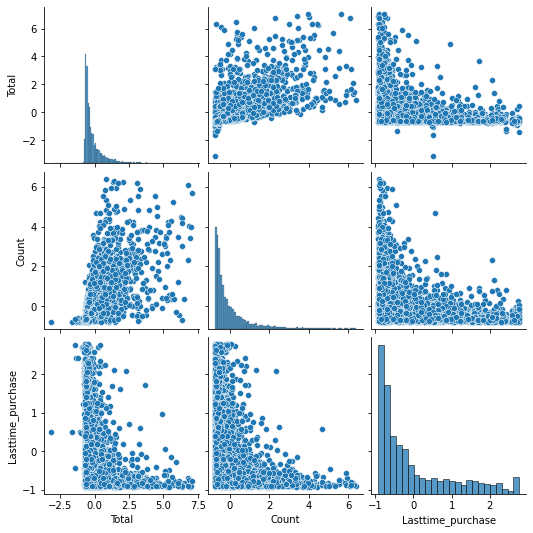

In [157]:
sns.pairplot(scaled_data_new)

In [158]:
scaled_data.corr()

,Id,Total,Count,Lasttime_purchase
Id,1.000000,-0.086169,0.007240,0.014058
Total,-0.086169,1.000000,0.679307,-0.325443
Count,0.007240,0.679307,1.000000,-0.350869
Lasttime_purchase,0.014058,-0.325443,-0.350869,1.000000


<AxesSubplot:>

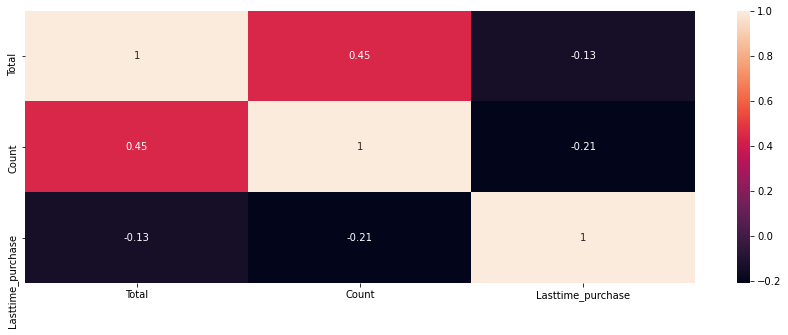

In [81]:
fig, axx=plt.subplots(1,1, figsize=(15,5))
sns.heatmap(data=scaled_data_new.corr(), annot=True, ax=axx)

# Clustering-Kmeans

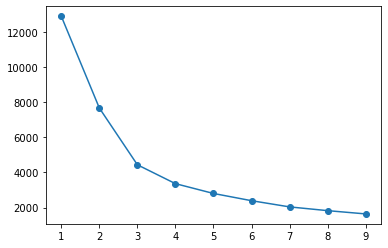

In [159]:
plot_data=[]

for i in range(1,10):
    k=KMeans(n_clusters=i)
    k.fit(scaled_data_new)
    plot_data.append(k.inertia_)
    
plt.plot(range(1,10), plot_data, marker='o')

# Silhouette coefficient
A silhouette coefficient, or a silhouette score is a metric used to evaluate the quality of clusters created by the algorithm. Silhouette scores range from -1 to +1.

In [160]:
Kmean=KMeans(n_clusters=3)
Kmean.fit(scaled_data_new)
print(silhouette_score(scaled_data_new, Kmean.labels_, metric='euclidean'))
scaled_data_new['label']=Kmean.labels_

0.5083576938573301


In [161]:
scaled_data_new

,Total,Count,Lasttime_purchase,label
0,-0.723741,-0.752890,2.296184,2
1,1.731616,1.042465,-0.901811,1
2,0.300126,-0.463639,-0.179044,0
3,0.277515,-0.044722,-0.743397,0
4,-0.533237,-0.603277,2.147671,2
...,...,...,...,...
4288,-0.624672,-0.683071,-0.198846,0
4289,-0.620855,-0.673097,1.820940,2
4290,-0.677699,-0.703019,0.860552,2
4291,-0.623134,-0.643174,-0.852307,0


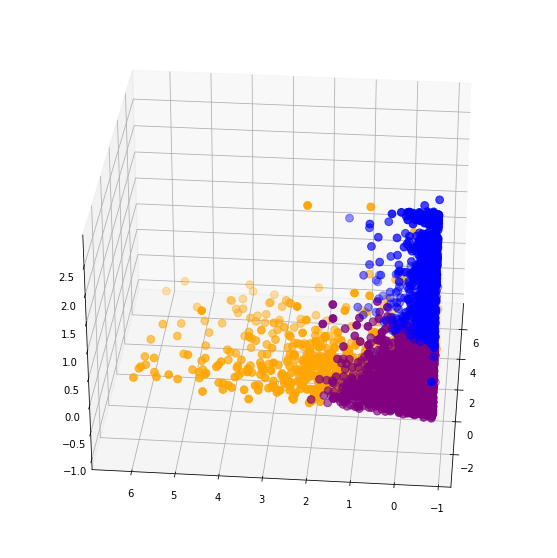

In [114]:

 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data_new.Total[scaled_data_new.label == 0], scaled_data_new["Count"][scaled_data_new.label == 0], scaled_data_new["Lasttime_purchase"][scaled_data_new.label == 0], c='blue', s=60)
ax.scatter(scaled_data_new.Total[scaled_data_new.label == 1], scaled_data_new["Count"][scaled_data_new.label == 1], scaled_data_new["Lasttime_purchase"][scaled_data_new.label == 1], c='orange', s=60)
ax.scatter(scaled_data_new.Total[scaled_data_new.label == 2], scaled_data_new["Count"][scaled_data_new.label == 2], scaled_data_new["Lasttime_purchase"][scaled_data_new.label == 2], c='purple', s=60)

ax.view_init(30, 185)
plt.show()

In [163]:
scaled_data_new

,Total,Count,Lasttime_purchase,label
0,-0.723741,-0.752890,2.296184,2
1,1.731616,1.042465,-0.901811,1
2,0.300126,-0.463639,-0.179044,0
3,0.277515,-0.044722,-0.743397,0
4,-0.533237,-0.603277,2.147671,2
...,...,...,...,...
4288,-0.624672,-0.683071,-0.198846,0
4289,-0.620855,-0.673097,1.820940,2
4290,-0.677699,-0.703019,0.860552,2
4291,-0.623134,-0.643174,-0.852307,0


# Hierarchial Cluster

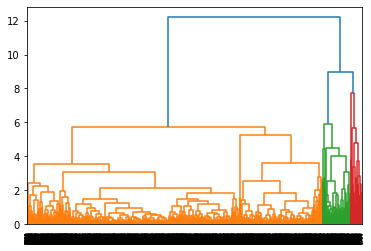

In [136]:

link=linkage(scaled_data_new, method="complete",metric='euclidean')
dendrogram(link)

plt.show()

In [164]:
tree = cut_tree(link, n_clusters=3).reshape(-1, )
tree

array([0, 1, 0, ..., 0, 0, 0])

In [165]:
print(silhouette_score(scaled_data_new, tree, metric='euclidean'))

0.46530849909981253


In [166]:
scaled_data_new['label_tree']=tree

In [167]:
scaled_data_new

,Total,Count,Lasttime_purchase,label,label_tree
0,-0.723741,-0.752890,2.296184,2,0
1,1.731616,1.042465,-0.901811,1,1
2,0.300126,-0.463639,-0.179044,0,0
3,0.277515,-0.044722,-0.743397,0,0
4,-0.533237,-0.603277,2.147671,2,0
...,...,...,...,...,...
4288,-0.624672,-0.683071,-0.198846,0,0
4289,-0.620855,-0.673097,1.820940,2,0
4290,-0.677699,-0.703019,0.860552,2,0
4291,-0.623134,-0.643174,-0.852307,0,0


# Cluster Analysis

In [168]:
scaled_data_analysis=scaled_data_new.drop('label_tree', axis=1)
scaled_data_analysis

,Total,Count,Lasttime_purchase,label
0,-0.723741,-0.752890,2.296184,2
1,1.731616,1.042465,-0.901811,1
2,0.300126,-0.463639,-0.179044,0
3,0.277515,-0.044722,-0.743397,0
4,-0.533237,-0.603277,2.147671,2
...,...,...,...,...
4288,-0.624672,-0.683071,-0.198846,0
4289,-0.620855,-0.673097,1.820940,2
4290,-0.677699,-0.703019,0.860552,2
4291,-0.623134,-0.643174,-0.852307,0


In [169]:
data_analysis=scaled_data_analysis.groupby(['label']).mean().reset_index()
data_analysis

,label,Total,Count,Lasttime_purchase
0,0,-0.181349,-0.178999,-0.476028
1,1,2.067012,2.088676,-0.701630
2,2,-0.502585,-0.518688,1.540964


### Spending Score vs Annual Income vs Age

Text(0.5, 1.0, 'Last time purchase by clusters')

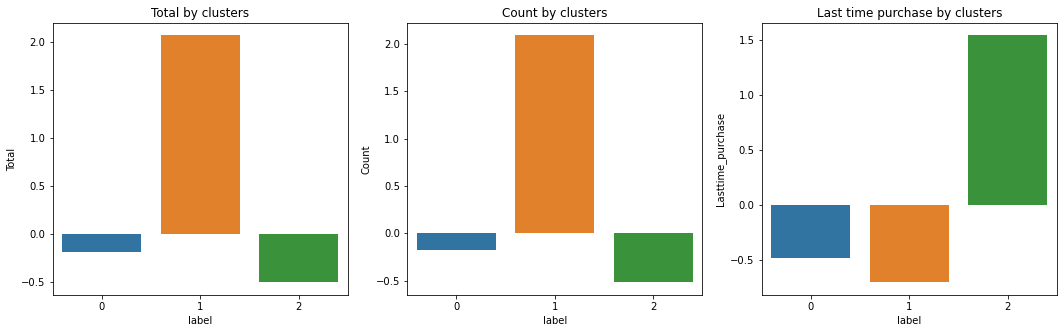

In [176]:
fix, ax=plt.subplots(1,3, figsize=(18,5))

sns.barplot(data=data_analysis, x='label', y='Total', ax=ax[0])
sns.barplot(data=data_analysis, x='label', y='Count', ax=ax[1])
sns.barplot(data=data_analysis, x='label', y='Lasttime_purchase', ax=ax[2])
ax[0].set_title('Total by clusters')
ax[1].set_title('Count by clusters')
ax[2].set_title('Last time purchase by clusters')


# Conclusion

### cluster 0:
-Medium spending, frequency, and recency.
>Customers in cluster 0 are normal customers because they occasionally bought items when needed.
### cluster 1:
-High spending, frequency, but low recency.
>Customers in cluster 1 are wholesalers because they bought a significant amount of items at once regularly.
### cuslter 2:
-Low spending, frequency, and high recency.
>Customers in cluster 2 are new customers because they bought only a few items recently without much history of transactions.